# Learning Rate schedules in Practice


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Fashion MMIST dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
# For faster training, let's use a subset 10,000
X_train, y_train = X_train_full[:10000] / 255.0, y_train_full[:10000]

## Building a NN model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model(): 
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(300, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    return model

In [ ]:
model = create_model()
model.summary()

## Helper functions for plotting

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [8]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

## 1. Constant Learning Rate

همان نرخ یادگیری پیش فرض در آپتیمایزر هاست.

In [9]:
# Create a new model
model = create_model()

In [ ]:
# Learning rate defaults to 0.01 according to https://keras.io/api/optimizers/sgd/
# To use a custom Learning Rate
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(
    optimizer=sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

history_constant = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=64
)

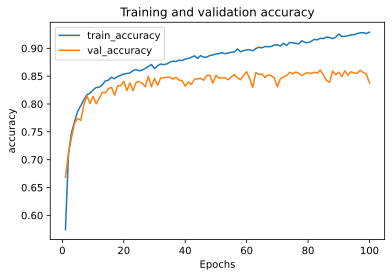

In [11]:
plot_metric(history_constant, 'accuracy')

## 2. Time-Based Decay

  lr = lr * 1(1 + decay * epoch)

  decay  معمولا بصورت زیر مقدار دهی می شود:

  decay = initial_lr / num_of_epochs

In [12]:
# Create a new model
model = create_model()

model.compile(
    optimizer='sgd', # Learning rate defaults to 0.01
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Define the learning rate schedule function
initial_learning_rate = 0.01
epochs = 100
decay = initial_learning_rate / epochs

def lr_time_based_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

history_time_based_decay = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lr_time_based_decay, verbose=1)],
)

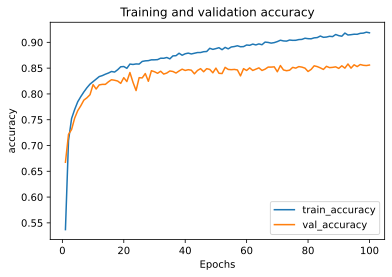

In [14]:
plot_metric(history_time_based_decay, 'accuracy')

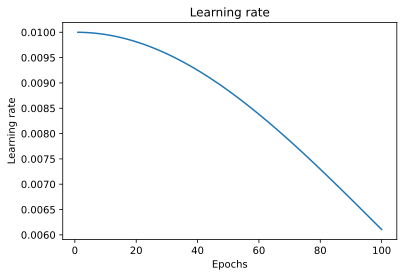

In [15]:
plot_lr(history_time_based_decay)

## 3. Step decay

lr = initial_lr + drop_rate ** floor(epoch / epoch_drop)

epoch: ایپاک فعلی

epoch_drop: هرچندتا ایپاک lr تغییر کنه

In [16]:
# Create a new model
model = create_model()

model.compile(
    optimizer='sgd', # Learning rate defaults to 0.01
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
# Define the learning rate schedule function
initial_learning_rate = 0.01

def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 10.0
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

# Fit the model to the training data
history_step_decay = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lr_step_decay, verbose=1)],
)

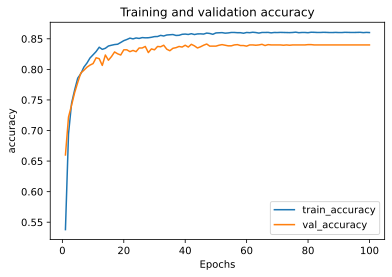

In [18]:
plot_metric(history_step_decay, 'accuracy')

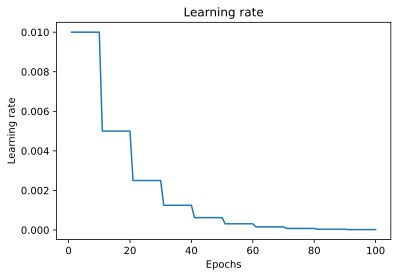

In [19]:
plot_lr(history_step_decay)

## 4. Exponential Decay

lr = initial_lr + e ** (-k * epoch)

k: هایپر پارامتر

epoch: ایپاک فعلی

In [20]:
# Create a new model
model = create_model()

model.compile(
    optimizer='sgd', # Learning rate defaults to 0.01
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
initial_learning_rate = 0.01

def lr_exp_decay(epoch, lr):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

# Fit the model to the training data
history_exp_decay = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_split=0.2,
    batch_size=64,
    callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)],
)

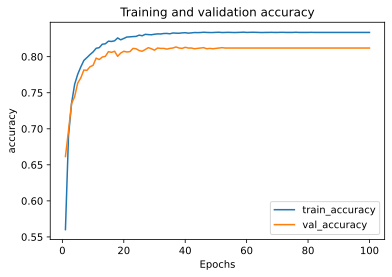

In [22]:
plot_metric(history_exp_decay, 'accuracy')

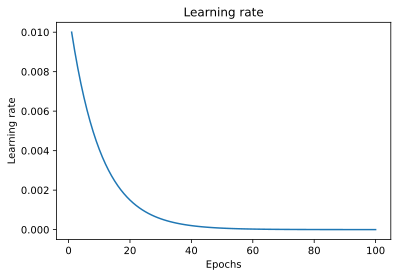

In [23]:
plot_lr(history_exp_decay)

## Compare model accuracy

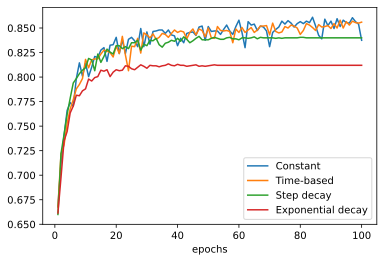

In [24]:
epochs = range(1, 101)
plt.plot(epochs,history_constant.history['val_accuracy'],label='Constant')
plt.plot(epochs,history_time_based_decay.history['val_accuracy'],label='Time-based')
plt.plot(epochs,history_step_decay.history['val_accuracy'],label='Step decay')
plt.plot(epochs,history_exp_decay.history['val_accuracy'],label='Exponential decay')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.show()